In [ ]:
# /content/sample_data/final_dataset_with_normal.csv
# /content/final_dataset_with_normal.csv

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

Batches:   0%|          | 0/24 [00:00<?, ?it/s]


=== TF-IDF + LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.87      0.72      0.79       349
  Harassment       0.83      0.83      0.83       252
  Defamation       0.45      0.88      0.60        50
  Misleading       0.78      0.89      0.83        87

    accuracy                           0.79       738
   macro avg       0.73      0.83      0.76       738
weighted avg       0.82      0.79      0.79       738

Confusion matrix (rows = true, cols = pred):
 [[253  35  53   8]
 [ 30 208   0  14]
 [  6   0  44   0]
 [  3   7   0  77]]


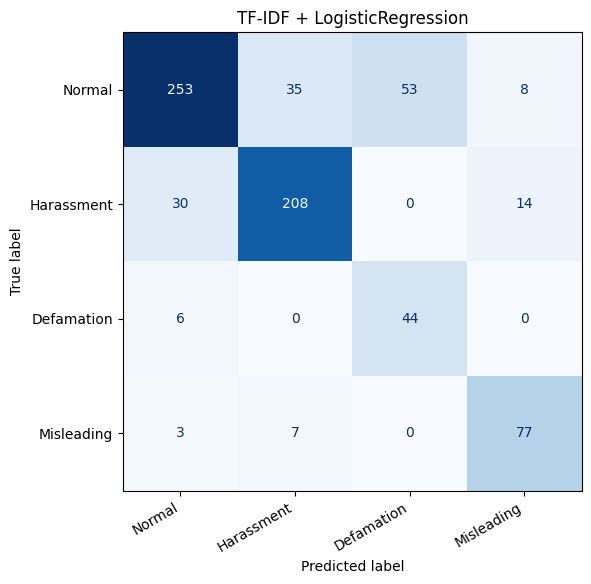


=== TF-IDF + LinearSVC ===
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       349
  Harassment       0.84      0.82      0.83       252
  Defamation       0.60      0.62      0.61        50
  Misleading       0.85      0.85      0.85        87

    accuracy                           0.82       738
   macro avg       0.78      0.78      0.78       738
weighted avg       0.82      0.82      0.82       738

Confusion matrix (rows = true, cols = pred):
 [[295  31  21   2]
 [ 34 207   0  11]
 [ 19   0  31   0]
 [  5   8   0  74]]


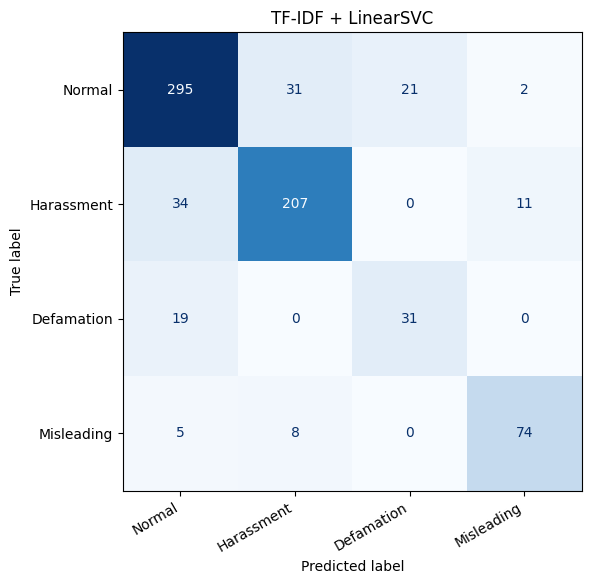


=== TF-IDF + RandomForest ===
              precision    recall  f1-score   support

      Normal       0.70      0.90      0.79       349
  Harassment       0.80      0.68      0.74       252
  Defamation       0.79      0.44      0.56        50
  Misleading       0.81      0.44      0.57        87

    accuracy                           0.74       738
   macro avg       0.77      0.62      0.66       738
weighted avg       0.75      0.74      0.73       738

Confusion matrix (rows = true, cols = pred):
 [[315  28   6   0]
 [ 71 172   0   9]
 [ 28   0  22   0]
 [ 33  16   0  38]]


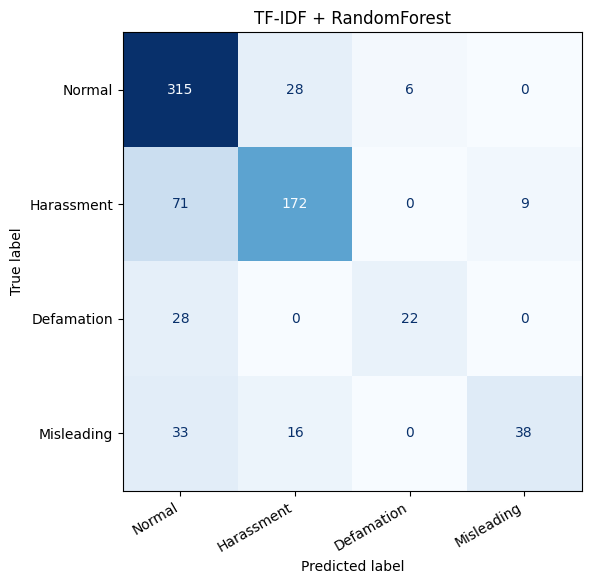


=== Embeddings + LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.88      0.72      0.79       349
  Harassment       0.82      0.86      0.84       252
  Defamation       0.49      0.90      0.63        50
  Misleading       0.80      0.90      0.85        87

    accuracy                           0.80       738
   macro avg       0.75      0.84      0.78       738
weighted avg       0.82      0.80      0.80       738

Confusion matrix (rows = true, cols = pred):
 [[250  44  46   9]
 [ 25 217   0  10]
 [  5   0  45   0]
 [  5   3   1  78]]


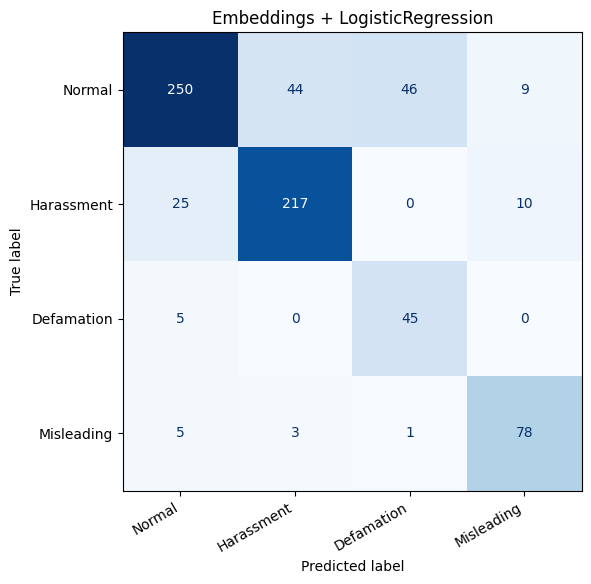


=== Embeddings + LinearSVC ===
              precision    recall  f1-score   support

      Normal       0.86      0.78      0.82       349
  Harassment       0.82      0.86      0.84       252
  Defamation       0.53      0.78      0.63        50
  Misleading       0.83      0.85      0.84        87

    accuracy                           0.81       738
   macro avg       0.76      0.82      0.78       738
weighted avg       0.82      0.81      0.82       738

Confusion matrix (rows = true, cols = pred):
 [[271  40  32   6]
 [ 27 216   0   9]
 [ 11   0  39   0]
 [  5   6   2  74]]


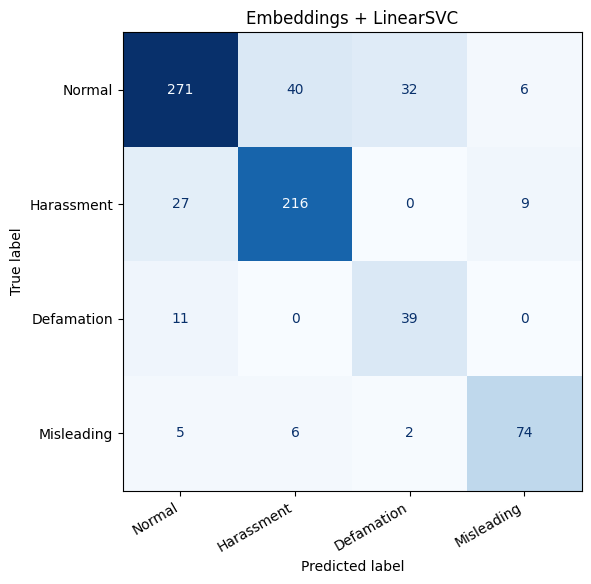


=== Embeddings + RandomForest ===
              precision    recall  f1-score   support

      Normal       0.68      0.93      0.79       349
  Harassment       0.85      0.69      0.76       252
  Defamation       0.75      0.24      0.36        50
  Misleading       0.78      0.41      0.54        87

    accuracy                           0.74       738
   macro avg       0.77      0.57      0.61       738
weighted avg       0.76      0.74      0.72       738

Confusion matrix (rows = true, cols = pred):
 [[323  22   4   0]
 [ 68 174   0  10]
 [ 38   0  12   0]
 [ 43   8   0  36]]


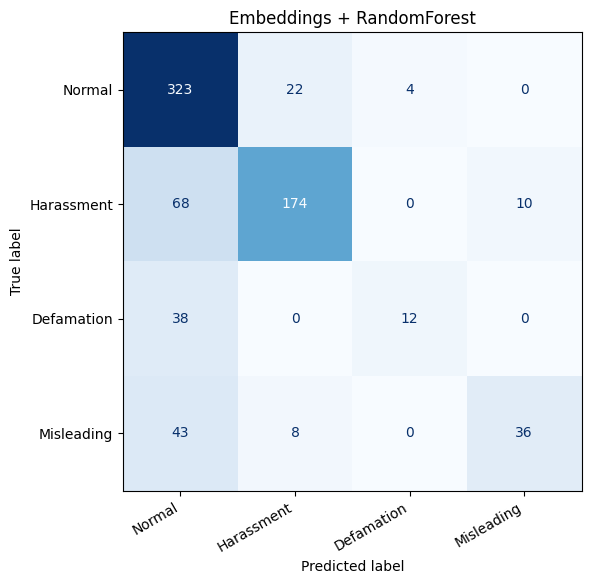

In [ ]:
# ------------------------------------------------------------
# 0. Imports
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# ------------------------------------------------------------
# 1. Load data
# ------------------------------------------------------------
file_path = "/content/final_dataset_with_normal.csv"
df = pd.read_csv(file_path)

X_text = df["text"]
y       = df["label"]

# ------------------------------------------------------------
# 2. One stratified split (shared by all models)
# ------------------------------------------------------------
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y,
)

# ------------------------------------------------------------
# 3. Build text representations
# ------------------------------------------------------------
# 3-a) TF-IDF (sparse)
tfidf = TfidfVectorizer(max_features=20_000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

# 3-b) SentenceTransformer (dense)
sent_model = SentenceTransformer("all-MiniLM-L6-v2")
X_train_emb = sent_model.encode(
    X_train_text.tolist(), batch_size=32, show_progress_bar=True
)
X_test_emb  = sent_model.encode(
    X_test_text.tolist(), batch_size=32, show_progress_bar=True
)

label_map = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading"
}
label_order  = [0, 1, 2, 3]
target_names = [label_map[i] for i in label_order]

# ------------------------------------------------------------
# 4. Helper to train / evaluate / plot
# ------------------------------------------------------------
def run_experiment(name, clf, X_tr, X_te):
    print(f"\n=== {name} ===")
    clf.fit(X_tr, y_train)
    y_pred = clf.predict(X_te)

    # Pretty per-class report with your label names
    print(
        classification_report(
            y_test,
            y_pred,
            labels=label_order,
            target_names=target_names,
            digits=2,
            zero_division=0
        )
    )

    # Confusion matrix with fixed label order and named axes
    cm = confusion_matrix(y_test, y_pred, labels=label_order)
    print("Confusion matrix (rows = true, cols = pred):\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_title(name)
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# 5. Sparse-vector models (TF-IDF)
# ------------------------------------------------------------
run_experiment(
    "TF-IDF + LogisticRegression",
    LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    X_train_tfidf,
    X_test_tfidf,
)

run_experiment(
    "TF-IDF + LinearSVC",
    LinearSVC(class_weight="balanced", random_state=42),
    X_train_tfidf,
    X_test_tfidf,
)

run_experiment(
    "TF-IDF + RandomForest",
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42,
    ),
    X_train_tfidf,
    X_test_tfidf,
)

# ------------------------------------------------------------
# 6. Dense-vector models (SentenceTransformer embeddings)
# ------------------------------------------------------------
run_experiment(
    "Embeddings + LogisticRegression",
    LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    X_train_emb,
    X_test_emb,
)

run_experiment(
    "Embeddings + LinearSVC",
    LinearSVC(class_weight="balanced", random_state=42),
    X_train_emb,
    X_test_emb,
)

run_experiment(
    "Embeddings + RandomForest",
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42,
    ),
    X_train_emb,
    X_test_emb,
)


In [ ]:
%pip install gensim

Loading static embeddings: glove-wiki-gigaword-300 …
Embedding dim: 300

=== TF-IDF + LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.87      0.73      0.79       349
  Harassment       0.83      0.83      0.83       252
  Defamation       0.46      0.88      0.60        50
  Misleading       0.77      0.86      0.82        87

    accuracy                           0.79       738
   macro avg       0.73      0.82      0.76       738
weighted avg       0.81      0.79      0.79       738

Confusion matrix (rows=true, cols=pred):
 [[254  35  52   8]
 [ 30 208   0  14]
 [  6   0  44   0]
 [  3   9   0  75]]


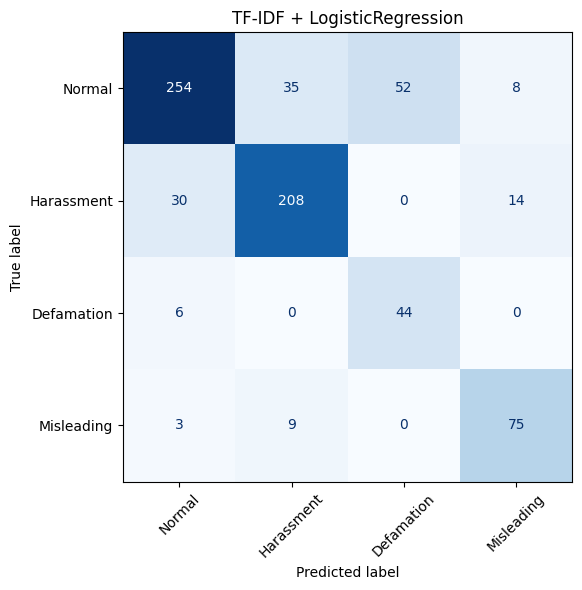


=== TF-IDF + LinearSVC ===
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       349
  Harassment       0.84      0.82      0.83       252
  Defamation       0.61      0.62      0.61        50
  Misleading       0.85      0.85      0.85        87

    accuracy                           0.82       738
   macro avg       0.78      0.79      0.78       738
weighted avg       0.82      0.82      0.82       738

Confusion matrix (rows=true, cols=pred):
 [[296  31  20   2]
 [ 34 207   0  11]
 [ 19   0  31   0]
 [  5   8   0  74]]


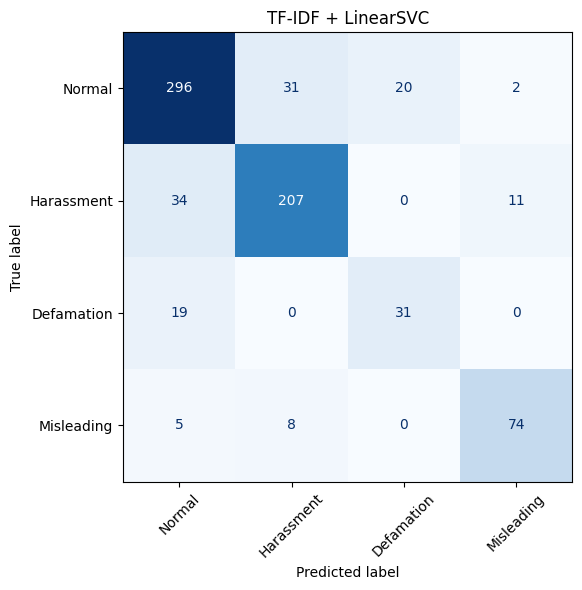


=== TF-IDF + RandomForest ===
              precision    recall  f1-score   support

      Normal       0.70      0.90      0.78       349
  Harassment       0.78      0.67      0.72       252
  Defamation       0.76      0.44      0.56        50
  Misleading       0.80      0.40      0.53        87

    accuracy                           0.73       738
   macro avg       0.76      0.60      0.65       738
weighted avg       0.74      0.73      0.72       738

Confusion matrix (rows=true, cols=pred):
 [[313  29   7   0]
 [ 74 169   0   9]
 [ 27   1  22   0]
 [ 35  17   0  35]]


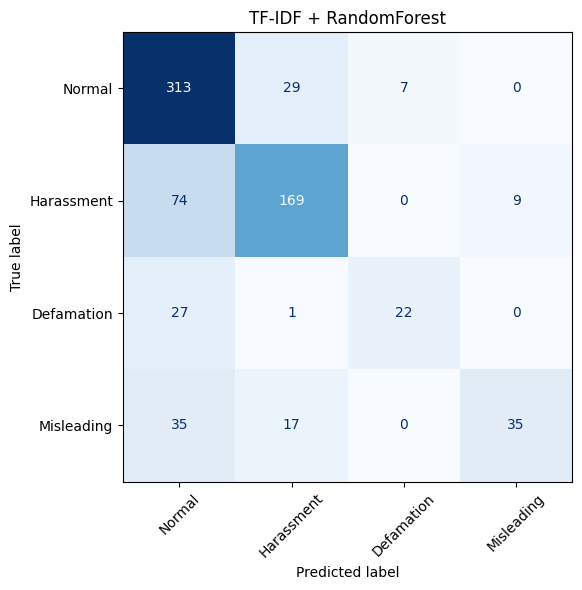


=== glove-wiki-gigaword-300 mean + LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.89      0.72      0.79       349
  Harassment       0.84      0.83      0.84       252
  Defamation       0.48      0.98      0.64        50
  Misleading       0.72      0.87      0.79        87

    accuracy                           0.79       738
   macro avg       0.73      0.85      0.77       738
weighted avg       0.83      0.79      0.80       738

Confusion matrix (rows=true, cols=pred):
 [[250  33  52  14]
 [ 26 210   1  15]
 [  1   0  49   0]
 [  3   7   1  76]]


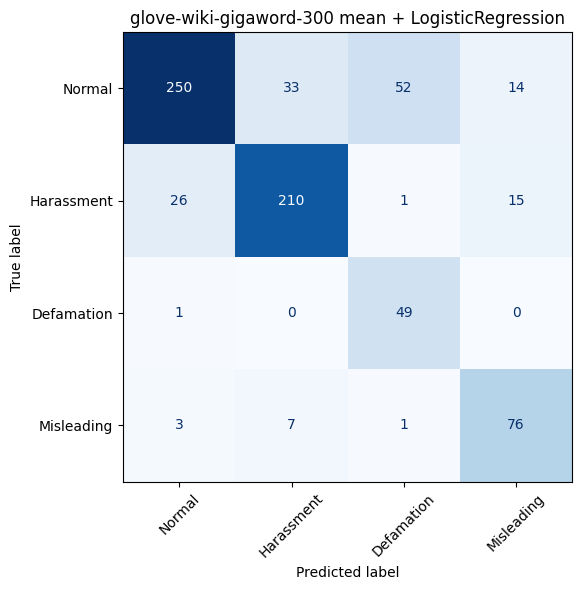


=== glove-wiki-gigaword-300 mean + LinearSVC ===
              precision    recall  f1-score   support

      Normal       0.87      0.76      0.81       349
  Harassment       0.84      0.83      0.84       252
  Defamation       0.50      0.88      0.64        50
  Misleading       0.76      0.84      0.80        87

    accuracy                           0.80       738
   macro avg       0.74      0.83      0.77       738
weighted avg       0.82      0.80      0.81       738

Confusion matrix (rows=true, cols=pred):
 [[265  32  42  10]
 [ 30 209   0  13]
 [  6   0  44   0]
 [  5   7   2  73]]


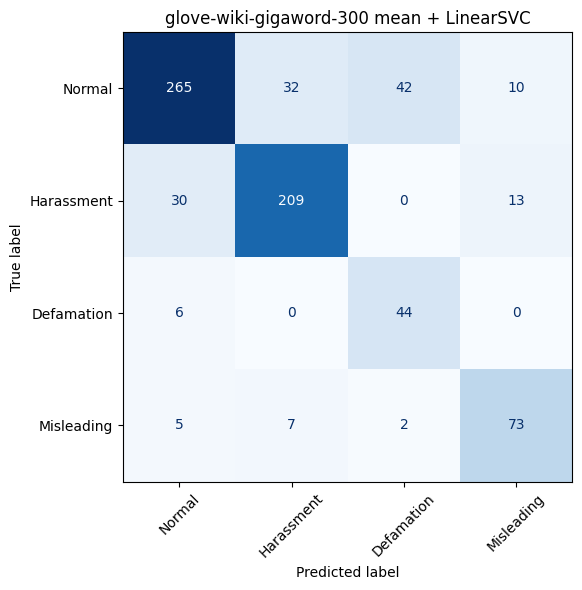


=== glove-wiki-gigaword-300 mean + RandomForest ===
              precision    recall  f1-score   support

      Normal       0.71      0.90      0.79       349
  Harassment       0.83      0.67      0.74       252
  Defamation       0.74      0.50      0.60        50
  Misleading       0.81      0.55      0.66        87

    accuracy                           0.75       738
   macro avg       0.77      0.66      0.70       738
weighted avg       0.77      0.75      0.75       738

Confusion matrix (rows=true, cols=pred):
 [[314  25   9   1]
 [ 73 169   0  10]
 [ 25   0  25   0]
 [ 29  10   0  48]]


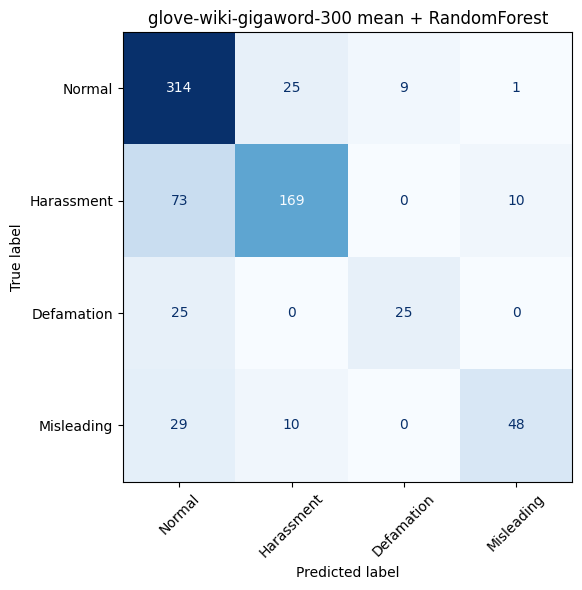


=== glove-wiki-gigaword-300 TF-IDF-weighted + LogisticRegression ===
              precision    recall  f1-score   support

      Normal       0.88      0.74      0.80       349
  Harassment       0.87      0.82      0.85       252
  Defamation       0.47      0.96      0.63        50
  Misleading       0.73      0.89      0.80        87

    accuracy                           0.80       738
   macro avg       0.74      0.85      0.77       738
weighted avg       0.83      0.80      0.80       738

Confusion matrix (rows=true, cols=pred):
 [[257  25  53  14]
 [ 28 207   2  15]
 [  2   0  48   0]
 [  5   5   0  77]]


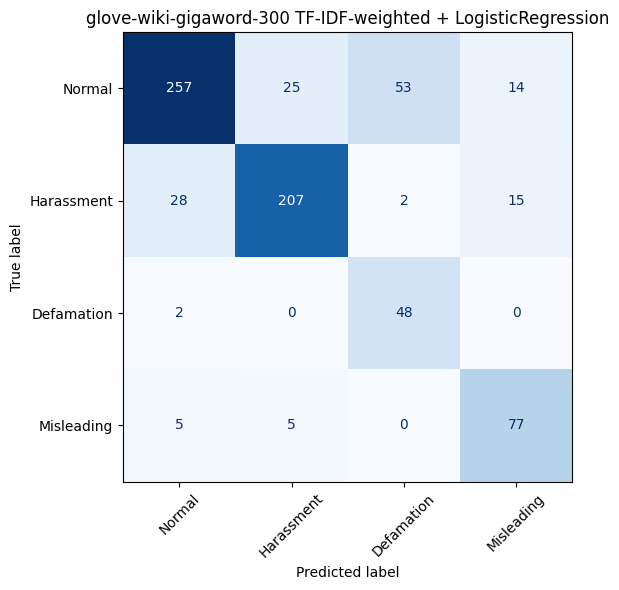


=== glove-wiki-gigaword-300 TF-IDF-weighted + LinearSVC ===
              precision    recall  f1-score   support

      Normal       0.85      0.78      0.81       349
  Harassment       0.86      0.79      0.82       252
  Defamation       0.49      0.84      0.62        50
  Misleading       0.73      0.84      0.78        87

    accuracy                           0.79       738
   macro avg       0.73      0.81      0.76       738
weighted avg       0.81      0.79      0.80       738

Confusion matrix (rows=true, cols=pred):
 [[272  25  39  13]
 [ 36 199   3  14]
 [  6   2  42   0]
 [  6   6   2  73]]


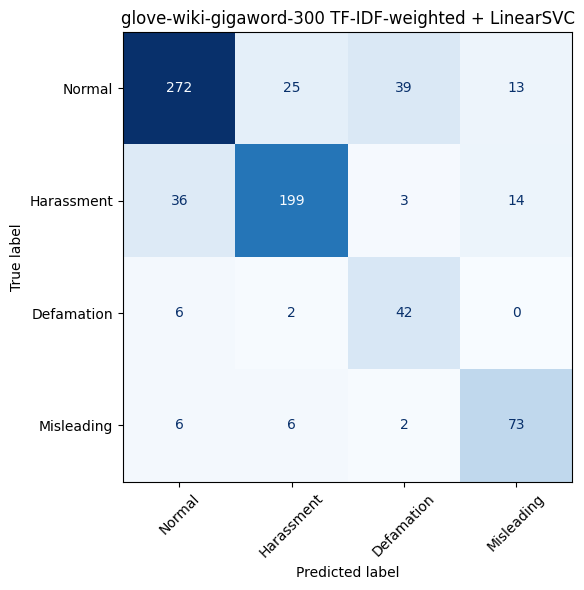


=== glove-wiki-gigaword-300 TF-IDF-weighted + RandomForest ===
              precision    recall  f1-score   support

      Normal       0.72      0.90      0.80       349
  Harassment       0.85      0.70      0.77       252
  Defamation       0.62      0.46      0.53        50
  Misleading       0.81      0.55      0.66        87

    accuracy                           0.76       738
   macro avg       0.75      0.65      0.69       738
weighted avg       0.77      0.76      0.75       738

Confusion matrix (rows=true, cols=pred):
 [[313  21  14   1]
 [ 66 176   0  10]
 [ 27   0  23   0]
 [ 29  10   0  48]]


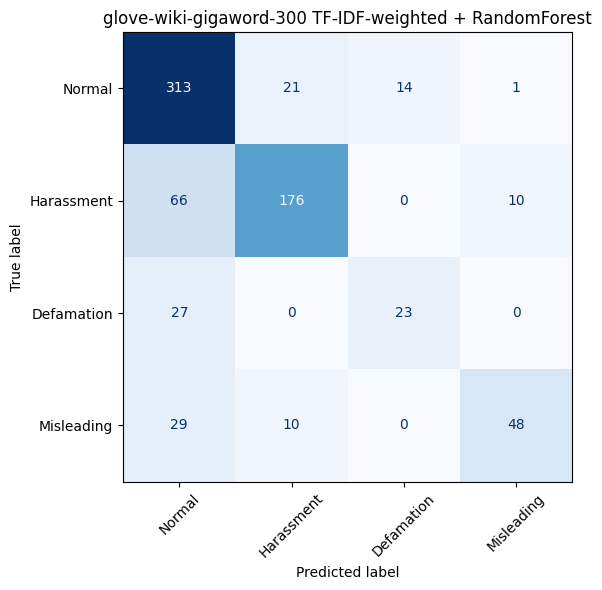

In [ ]:
# ------------------------------------------------------------
# 0) Imports
# ------------------------------------------------------------
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.utils import simple_preprocess
import gensim.downloader as api

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# ------------------------------------------------------------
# 1) Load data
# ------------------------------------------------------------
file_path = "/content/final_dataset_with_normal.csv"
df = pd.read_csv(file_path)

X_text = df["text"].astype(str)
y      = df["label"].astype(int)

label_map = {
    0: "Normal",
    1: "Harassment",
    2: "Defamation",
    3: "Misleading"
}
labels_order = [0, 1, 2, 3]
target_names = [label_map[i] for i in labels_order]

# ------------------------------------------------------------
# 2) Stratified split (shared by all models)
# ------------------------------------------------------------
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.20, random_state=42, stratify=y
)

# ------------------------------------------------------------
# 3) TF-IDF (sparse) – baseline features
# ------------------------------------------------------------
tfidf = TfidfVectorizer(max_features=20_000, ngram_range=(1, 2), lowercase=True)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

# Build an IDF lookup for TF-IDF–weighted static pooling
idf_lookup = {}
vocab = tfidf.vocabulary_
idf = getattr(tfidf, "idf_", None)
if idf is not None:
    # Map token -> idf weight
    inv_vocab = {idx: tok for tok, idx in vocab.items()}
    idf_lookup = {inv_vocab[i]: float(idf[i]) for i in range(len(inv_vocab))}

# ------------------------------------------------------------
# 4) Static embeddings (GloVe / fastText / word2vec)
#    Pick one of:
#      "glove-wiki-gigaword-300"
#      "fasttext-wiki-news-subwords-300"
#      "word2vec-google-news-300"
# ------------------------------------------------------------
MODEL_NAME = "glove-wiki-gigaword-300"
print(f"Loading static embeddings: {MODEL_NAME} …")
wv = api.load(MODEL_NAME)   # downloads if not cached
EMB_DIM = wv.vector_size
print(f"Embedding dim: {EMB_DIM}")

# Clean/tokenize
def tokenize(text):
    # gensim simple_preprocess lowercases, strips punctuation, keeps alphabetic tokens
    return simple_preprocess(str(text), deacc=True, min_len=1)

# Sentence vector: simple mean of word vectors
def sentvec_mean(tokens, wv_model):
    vecs = [wv_model[t] for t in tokens if t in wv_model]
    if not vecs:
        return np.zeros(wv_model.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0).astype(np.float32)

# Sentence vector: TF-IDF–weighted mean of word vectors
def sentvec_tfidf(tokens, wv_model, idf_dict):
    weighted = []
    weights = []
    for t in tokens:
        if t in wv_model:
            w = idf_dict.get(t, 1.0)  # fallback weight if OOV in TF-IDF vocab
            weighted.append(wv_model[t] * w)
            weights.append(w)
    if not weighted:
        return np.zeros(wv_model.vector_size, dtype=np.float32)
    weighted = np.stack(weighted, axis=0)
    weights = np.array(weights, dtype=np.float32)
    return (weighted.sum(axis=0) / (weights.sum() + 1e-8)).astype(np.float32)

def build_static_matrix(texts, wv_model, mode="mean", idf_dict=None):
    mats = []
    for s in texts:
        toks = tokenize(s)
        if mode == "tfidf":
            mats.append(sentvec_tfidf(toks, wv_model, idf_dict or {}))
        else:
            mats.append(sentvec_mean(toks, wv_model))
    return np.stack(mats, axis=0)

# Build mean and TF-IDF–weighted static embeddings
X_train_mean  = build_static_matrix(X_train_text, wv, mode="mean")
X_test_mean   = build_static_matrix(X_test_text, wv, mode="mean")
X_train_wmean = build_static_matrix(X_train_text, wv, mode="tfidf", idf_dict=idf_lookup)
X_test_wmean  = build_static_matrix(X_test_text, wv, mode="tfidf", idf_dict=idf_lookup)

# ------------------------------------------------------------
# 5) Helper: train / evaluate / plot
# ------------------------------------------------------------
def run_experiment(name, clf, X_tr, X_te):
    print(f"\n=== {name} ===")
    clf.fit(X_tr, y_train)
    y_pred = clf.predict(X_te)

    print(classification_report(
        y_test, y_pred,
        labels=labels_order,
        target_names=target_names,
        digits=2))
    cm = confusion_matrix(y_test, y_pred, labels=labels_order)
    print("Confusion matrix (rows=true, cols=pred):\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap="Blues", colorbar=False, xticks_rotation=45)
    ax.set_title(name)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 6) Sparse-vector models (TF-IDF)
# ------------------------------------------------------------
run_experiment(
    "TF-IDF + LogisticRegression",
    LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    X_train_tfidf, X_test_tfidf
)

run_experiment(
    "TF-IDF + LinearSVC",
    LinearSVC(class_weight="balanced", random_state=42),
    X_train_tfidf, X_test_tfidf
)

run_experiment(
    "TF-IDF + RandomForest",
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42,
    ),
    X_train_tfidf, X_test_tfidf
)

# ------------------------------------------------------------
# 7) Static-embedding models (mean pooling)
# ------------------------------------------------------------
run_experiment(
    f"{MODEL_NAME} mean + LogisticRegression",
    LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    X_train_mean, X_test_mean
)

run_experiment(
    f"{MODEL_NAME} mean + LinearSVC",
    LinearSVC(class_weight="balanced", random_state=42),
    X_train_mean, X_test_mean
)

run_experiment(
    f"{MODEL_NAME} mean + RandomForest",
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42,
    ),
    X_train_mean, X_test_mean
)

# ------------------------------------------------------------
# 8) Static-embedding models (TF-IDF–weighted pooling)
# ------------------------------------------------------------
run_experiment(
    f"{MODEL_NAME} TF-IDF-weighted + LogisticRegression",
    LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1),
    X_train_wmean, X_test_wmean
)

run_experiment(
    f"{MODEL_NAME} TF-IDF-weighted + LinearSVC",
    LinearSVC(class_weight="balanced", random_state=42),
    X_train_wmean, X_test_wmean
)

run_experiment(
    f"{MODEL_NAME} TF-IDF-weighted + RandomForest",
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42,
    ),
    X_train_wmean, X_test_wmean
)


In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/final_dataset_with_normal.csv'
df = pd.read_csv(file_path)

In [ ]:

label_counts = df['label'].value_counts().sort_index()
print(label_counts)

label
0    1747
1    1261
2     249
3     433
Name: count, dtype: int64


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = SentenceTransformer('all-MiniLM-L6-v2')
X_embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

X_train, X_test, y_train, y_test = train_test_split(X_embeddings, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/116 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.72      0.79       349
           1       0.82      0.86      0.84       252
           2       0.49      0.90      0.63        50
           3       0.80      0.90      0.85        87

    accuracy                           0.80       738
   macro avg       0.75      0.84      0.78       738
weighted avg       0.82      0.80      0.80       738



In [ ]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
cm   = confusion_matrix(y_test, pred, labels=[0,1,2,3])
print(cm)

[[250  44  46   9]
 [ 25 217   0  10]
 [  5   0  45   0]
 [  5   3   1  78]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, y = df['text'], df['label']

# 2) Stratified train-test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 3) Linear SVM pipeline
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20_000, ngram_range=(1,2))),
    ('clf', LinearSVC(class_weight='balanced'))
])
svm_pipe.fit(X_tr, y_tr)
print("\n=== Linear SVM ===")
print(classification_report(y_te, svm_pipe.predict(X_te)))

# 4) Random-Forest pipeline
rf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20_000, ngram_range=(1,2))),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        n_jobs=-1,
        class_weight='balanced_subsample',
        random_state=42))
])
rf_pipe.fit(X_tr, y_tr)
print("\n=== Random Forest ===")
print(classification_report(y_te, rf_pipe.predict(X_te)))


=== Linear SVM ===
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       349
           1       0.84      0.82      0.83       252
           2       0.60      0.62      0.61        50
           3       0.85      0.85      0.85        87

    accuracy                           0.82       738
   macro avg       0.78      0.78      0.78       738
weighted avg       0.82      0.82      0.82       738


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       349
           1       0.80      0.68      0.74       252
           2       0.79      0.44      0.56        50
           3       0.81      0.44      0.57        87

    accuracy                           0.74       738
   macro avg       0.77      0.62      0.66       738
weighted avg       0.75      0.74      0.73       738



# ADD Confusion Matrices

In [ ]:
!wget -q https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip

In [ ]:
!unzip -q stanford-ner-4.2.0.zip

In [ ]:
!pip install -q nltk tqdm pandas

In [ ]:
!pip -q install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("surekharamireddy/malignant-comment-classification")

print("Path to dataset files:", path)

100%|██████████| 50.5M/50.5M [00:00<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/surekharamireddy/malignant-comment-classification/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/surekharamireddy/malignant-comment-classification/versions/1'

In [ ]:
import os, pathlib

print("Dataset root:", path)          # path returned by kagglehub

# Quick one-level listing
print("\nTop-level files:")
print(os.listdir(path))

# Recursive listing (shows every file with its relative folder)
print("\nFull tree:")
for p in pathlib.Path(path).rglob('*'):
    if p.is_file():
        print(p.relative_to(path))

Dataset root: /root/.cache/kagglehub/datasets/surekharamireddy/malignant-comment-classification/versions/1

Top-level files:
['test.csv', 'train.csv']

Full tree:
test.csv
train.csv


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import os, nltk, pandas as pd
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# Tell NLTK where the JAR and model live
jar   = "/content/stanford-ner-2020-11-17/stanford-ner-4.2.0.jar"
model = "/content/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz"
os.environ["JAVAHOME"] = "/usr/lib/jvm/default-java"  # Colab default

tagger = StanfordNERTagger(model, jar, encoding='utf-8')

# ======================= LOAD YOUR DATA ========================
# Replace with your actual file path
har_csv = os.path.join(path, "train.csv")
har_df  = pd.read_csv(har_csv)   # columns: comment_text, label6

# ======================= FILTER FUNCTION ======================
def has_target(text: str) -> bool:
    tokens = word_tokenize(text)
    tags   = tagger.tag(tokens)
    return any(tag[1] in ('PERSON', 'ORGANIZATION') for tag in tags)

# ======================= APPLY FILTER =========================
tqdm.pandas(desc="NER filter")
har_df["keep"] = har_df["comment_text"].progress_apply(has_target)

har_target = har_df[har_df["keep"]].copy()
print("Rows with PERSON or ORG:", len(har_target))

# Label assignment
har_target["label"] = 1

NER filter:   0%|          | 428/159571 [17:15<106:57:34,  2.42s/it]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(file_path)

# encode numeric → string labels for nicer reports
label_names = {0:"Normal", 1:"Harassment", 2:"Defamation", 3:"Misleading"}
df["label_name"] = df["label"].map(label_names)

# Train/validation split (stratified)
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label"], random_state=42
)

# HuggingFace Dataset objects
train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))

In [ ]:
from transformers import AutoTokenizer

def tokenize_for(model_name, dataset, max_len=128):
    tok = AutoTokenizer.from_pretrained(model_name)
    def _tok(batch):
        return tok(batch["text"], truncation=True, padding="max_length", max_length=max_len)
    return dataset.map(_tok, batched=True)

In [ ]:
import numpy as np
import evaluate


In [ ]:
import numpy as np
import evaluate
from transformers import (
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)

accuracy = evaluate.load("accuracy")
f1_macro = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1_macro": f1_macro.compute(
            predictions=preds, references=labels, average="macro")["f1"]
    }

def train_and_eval(model_name, output_dir):
    tok_train = tokenize_for(model_name, train_ds)
    tok_val   = tokenize_for(model_name, val_ds)

    model = AutoModelForSequenceClassification.from_pretrained(
        model_name, num_labels=4
    )

    args = TrainingArguments(
        output_dir          = output_dir,
        save_strategy       = "no",
        learning_rate       = 2e-5,
        per_device_train_batch_size = 16,
        per_device_eval_batch_size  = 32,
        num_train_epochs    = 3,
        weight_decay        = 0.01,
        eval_strategy = "epoch",
        logging_steps       = 50,
        load_best_model_at_end=False,
        report_to="none",
    )

    trainer = Trainer(
        model          = model,
        args           = args,
        train_dataset  = tok_train,
        eval_dataset   = tok_val,
        compute_metrics= compute_metrics,
    )
    trainer.train()
    metrics = trainer.evaluate()
    print(f"\n✅ {model_name} metrics:", metrics)
    trainer.save_model(output_dir)           # saves model + tokenizer files
    return metrics

In [ ]:
distil_metrics = train_and_eval(
    model_name="distilbert-base-uncased",
    output_dir="/content/sample_data/distilbert_legalrisk"
)

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.455300,0.368931,0.849593,0.822615
2,0.253100,0.335229,0.888889,0.861513
3,0.164700,0.341263,0.888889,0.863869



✅ distilbert-base-uncased metrics: {'eval_loss': 0.3412628471851349, 'eval_accuracy': 0.8888888888888888, 'eval_f1_macro': 0.86386863534985, 'eval_runtime': 107.325, 'eval_samples_per_second': 6.876, 'eval_steps_per_second': 0.224, 'epoch': 3.0}


In [ ]:
print("\nDistilBERT:", distil_metrics)


DistilBERT: {'eval_loss': 0.3412628471851349, 'eval_accuracy': 0.8888888888888888, 'eval_f1_macro': 0.86386863534985, 'eval_runtime': 107.325, 'eval_samples_per_second': 6.876, 'eval_steps_per_second': 0.224, 'epoch': 3.0}


In [ ]:
from sklearn.metrics import classification_report
preds = np.argmax(trainer.predict(tok_val).predictions, axis=1)
print(classification_report(val_ds["label"], preds, target_names=list(label_names.values())))


NameError: name 'trainer' is not defined

              precision    recall  f1-score   support

      Normal       0.89      0.93      0.91       349
  Harassment       0.92      0.86      0.89       252
  Defamation       0.82      0.74      0.78        50
  Misleading       0.85      0.92      0.88        87

    accuracy                           0.89       738
   macro avg       0.87      0.86      0.86       738
weighted avg       0.89      0.89      0.89       738



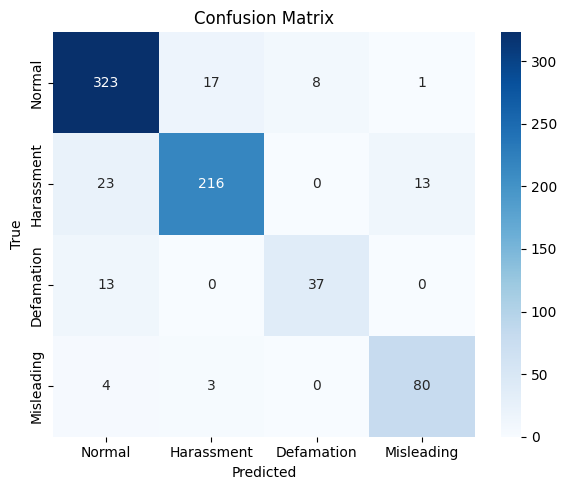

In [ ]:
MODEL_DIR = "/content/sample_data/distilbert_legalrisk"          # folder with .bin & tokenizer files
CSV_PATH  = "/content/final_dataset_with_normal.csv" # your full dataset
AutoTokenizer.from_pretrained("distilbert-base-uncased").save_pretrained(MODEL_DIR)
import pandas as pd, torch, numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

# ── 1. reload model + tokenizer ───────────────────────────────────────────────
model     = AutoModelForSequenceClassification.from_pretrained(MODEL_DIR)
tokenizer = AutoTokenizer.from_pretrained(MODEL_DIR)   # now available
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

# ── 2. recreate the validation split (same seed & stratify) ───────────────────
df = pd.read_csv(CSV_PATH)
X_train, X_val, y_train, y_val = train_test_split(
    df["text"], df["label"], test_size=0.20, stratify=df["label"], random_state=42
)

# ── 3. tokenize in a single batch (OK for ~750 samples, else chunk) ───────────
enc = tokenizer(
    X_val.tolist(),
    truncation=True, padding="max_length",
    max_length=128, return_tensors="pt"
).to(device)

with torch.no_grad():
    logits = model(**enc).logits
y_pred = logits.argmax(dim=1).cpu().numpy()
y_true = y_val.to_numpy()

# ── 4. classification report ─────────────────────────────────────────────────
label_names = ["Normal", "Harassment", "Defamation", "Misleading"]
print(classification_report(y_true, y_pred, target_names=label_names, digits=2))

# ── 5. confusion matrix heat-map (optional) ───────────────────────────────────
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.tight_layout(); plt.show()

In [ ]:
cm = confusion_matrix(y_true_ids, y_pred_ids, labels=[0,1,2,3])
print(cm)

[[323  17   8   1]
 [ 23 216   0  13]
 [ 13   0  37   0]
 [  4   3   0  80]]


# Legal BERT


precision    recall  f1-score   support

      Normal       0.85      0.90      0.88       349
  Harassment       0.90      0.81      0.85       252
  Defamation       0.75      0.72      0.73        50
  Misleading       0.80      0.87      0.84        87

    accuracy                           0.86       738
   macro avg       0.83      0.83      0.83       738
weighted avg       0.86      0.86      0.85       738

Confusion-matrix:

 [[315  18  12   4]

 [ 33 204   0  15]

 [ 14   0  36   0]

 [  7   4   0  76]]

In [ ]:
%pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np, torch, evaluate
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, EarlyStoppingCallback)
from torch.nn import CrossEntropyLoss
import torch.nn.functional as F
from collections import Counter

# ---------- metrics ----------
acc = evaluate.load("accuracy")
f1  = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        "accuracy": acc.compute(predictions=preds, references=labels)["accuracy"],
        "f1_macro": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }

# ---------- tokenization ----------
def tokenize_for(model_name, ds: Dataset, max_length=256):
    tok = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    def _tok(batch):
        return tok(batch["text"], truncation=True, padding="max_length", max_length=max_length)
    cols_to_remove = [c for c in ds.column_names if c not in ("text","label")]
    return ds.map(_tok, batched=True, remove_columns=cols_to_remove).with_format("torch")

# ---------- optional weighted / focal losses ----------
def get_class_weights(ds, num_labels=4):
    counts = Counter(ds["label"])
    total  = sum(counts.values())
    freqs  = np.array([counts.get(i,0) for i in range(num_labels)], dtype=np.float32)
    weights = total / (num_labels * np.maximum(freqs, 1))
    return torch.tensor(weights, dtype=torch.float)

class FocalLoss(torch.nn.Module):
    def __init__(self, weight=None, gamma=2.0):
        super().__init__()
        self.weight = weight
        self.gamma  = gamma
    def forward(self, logits, target):
        ce = F.cross_entropy(logits, target, weight=self.weight, reduction="none")
        pt = torch.exp(-ce)
        loss = ((1-pt)**self.gamma * ce).mean()
        return loss

class LossTrainer(Trainer):
    """Allows weighted CE or focal loss via kwargs: loss_type, class_weights, gamma."""
    def __init__(self, loss_type="ce", class_weights=None, gamma=2.0, **kwargs):
        super().__init__(**kwargs)
        self.loss_type = loss_type
        self.class_weights = class_weights.to(self.args.device) if class_weights is not None else None
        self.focal = FocalLoss(self.class_weights, gamma) if loss_type=="focal" else None
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits  = outputs.logits
        if self.loss_type == "focal":
            loss = self.focal(logits, labels)
        elif self.loss_type == "weighted_ce" and self.class_weights is not None:
            loss = CrossEntropyLoss(weight=self.class_weights)(logits, labels)
        else:
            loss = CrossEntropyLoss()(logits, labels)
        return (loss, outputs) if return_outputs else loss

# ---------- main experiment function ----------
def train_and_eval(model_name, output_dir,
                   max_length=256, lr=2e-5, epochs=3,
                   bsz_train=16, bsz_eval=32,
                   loss_type="ce", gamma=2.0, seed=42,
                   warmup_ratio=0.06, weight_decay=0.01,
                   early_stop=True):
    torch.manual_seed(seed); np.random.seed(seed)

    tok_train = tokenize_for(model_name, train_ds, max_length=max_length)
    tok_val   = tokenize_for(model_name, val_ds,   max_length=max_length)

    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
    # (Optional) tweak classifier dropout if your model supports it
    if hasattr(model.config, "seq_classif_dropout"): model.config.seq_classif_dropout = 0.2

    # class weights if requested
    class_weights = get_class_weights(train_ds) if loss_type in {"weighted_ce","focal"} else None

    watch_metric = "f1_macro"   # must match compute_metrics' key
    greater_is_better = True

    args = TrainingArguments(
        output_dir=output_dir,
        # --- Key changes for Early Stopping ---
        eval_strategy="epoch",          # 1. Evaluate at the end of each epoch.
        save_strategy="epoch",          # 2. Save a checkpoint at the same interval.
        load_best_model_at_end=True,    # 3. Load the best model found during training.
        metric_for_best_model="f1_macro", # 4. Tell it to monitor the 'f1_macro' score.
        greater_is_better=True,         #    (Optional but good practice for F1 score)
        # --- Your other arguments ---
        learning_rate=lr,
        per_device_train_batch_size=bsz_train,
        per_device_eval_batch_size=bsz_eval,
        num_train_epochs=epochs,
        warmup_ratio=warmup_ratio,
        weight_decay=weight_decay,
        logging_steps=50,
        report_to="none",
        seed=seed,
        fp16=torch.cuda.is_available()
    )

    callbacks = [EarlyStoppingCallback(early_stopping_patience=2)] if early_stop else None
    trainer = LossTrainer(
        model=model, args=args,
        train_dataset=tok_train, eval_dataset=tok_val,
        compute_metrics=compute_metrics,
        loss_type=loss_type, class_weights=class_weights, gamma=gamma,
        callbacks=callbacks
    )

    trainer.train()
    metrics = trainer.evaluate()
    print(f"\n✅ {model_name} @ max_len={max_length}, loss={loss_type}, lr={lr}, epochs={epochs}")
    print(metrics)

    # Detailed per-class report
    preds = trainer.predict(tok_val)
    y_true = preds.label_ids
    y_pred = preds.predictions.argmax(axis=1)
    print("\nPer-class report:\n", classification_report(y_true, y_pred, digits=2))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred, labels=[0,1,2,3]))

    trainer.save_model(output_dir)
    return metrics


In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
file_path = "/content/final_dataset_with_normal.csv"
df = pd.read_csv(file_path)

# encode numeric → string labels for nicer reports
label_names = {0:"Normal", 1:"Harassment", 2:"Defamation", 3:"Misleading"}
df["label_name"] = df["label"].map(label_names)

# Train/validation split (stratified)
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label"], random_state=42
)

# HuggingFace Dataset objects
train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))

In [ ]:
# 1) Your current baseline
train_and_eval("distilbert-base-uncased", "/content/sample_data/exp_base")

# 2) Help Defamation: longer sequences + weighted CE
train_and_eval("distilbert-base-uncased", "/content/sample_data/exp_len320_wce",
               max_length=320, epochs=4, loss_type="weighted_ce")

# 3) If class 2 recall still low: focal loss (γ=2)
train_and_eval("distilbert-base-uncased", "/content/sample_data/exp_focal",
               max_length=320, epochs=4, loss_type="focal", gamma=2.0)

# 4) Small LR/seed sweep (often stabilises results)
for seed in [41,42,43]:
    train_and_eval("distilbert-base-uncased", f"/content/sample_data/exp_len320_lr15e5_s{seed}",
                   max_length=320, lr=1.5e-5, epochs=4, loss_type="weighted_ce", seed=seed)


Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.429600,0.363408,0.857724,0.830456


KeyboardInterrupt: 

In [ ]:
# --- Supervised-contrastive warm-up, then CE fine-tune for DistilBERT ---
import torch, torch.nn as nn, torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset

# 1) Tokenization (reuses your pattern)
def tokenize_for(model_name, ds: Dataset, max_length=256):
    tok = AutoTokenizer.from_pretrained(model_name, use_fast=True)
    def _tok(batch):
        return tok(batch["text"], truncation=True, padding="max_length", max_length=max_length)
    cols_to_remove = [c for c in ds.column_names if c not in ("text","label")]
    return ds.map(_tok, batched=True, remove_columns=cols_to_remove).with_format("torch")

# 2) SupCon model: encoder + projection head
class SupConEncoder(nn.Module):
    def __init__(self, model_name, proj_dim=128):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)  # e.g., distilbert-base-uncased
        hid = self.encoder.config.hidden_size
        self.proj = nn.Sequential(
            nn.Linear(hid, hid), nn.ReLU(), nn.Linear(hid, proj_dim)
        )
    def forward(self, input_ids=None, attention_mask=None, **kwargs):
        out = self.encoder(input_ids=input_ids, attention_mask=attention_mask, **kwargs)                         # DistilBERT has no pooler
        cls = out.last_hidden_state[:, 0, :]                 # [B, H]
        z = self.proj(cls)                                   # [B, D]
        z = F.normalize(z, dim=-1)
        return z

# 3) SupCon loss (Khosla et al. 2020)
def supervised_contrastive_loss(z, labels, temperature=0.1):
    # z: [N, D], labels: [N]
    sim = torch.matmul(z, z.T) / temperature                 # [N, N]
    # mask to remove self-comparisons
    self_mask = torch.eye(sim.size(0), device=sim.device, dtype=torch.bool)
    sim = sim.masked_fill(self_mask, float('-inf'))

    labels = labels.view(-1, 1)
    pos_mask = (labels == labels.T) & (~self_mask)           # positives = same label, not self
    # log-softmax over rows
    log_prob = sim - torch.logsumexp(sim, dim=1, keepdim=True)
    # for rows with at least one positive, average log-prob over positives
    pos_counts = pos_mask.sum(dim=1).clamp(min=1)
    loss = -(log_prob.masked_fill(~pos_mask, 0).sum(dim=1) / pos_counts).mean()
    return loss

# 4) Trainer for SupCon: forward twice (dropout noise gives two "views")
class SupConTrainer(Trainer):
    def __init__(self, temperature=0.1, **kwargs):
        super().__init__(**kwargs)
        self.temperature = temperature
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # labels are used
        labels = inputs["labels"]
        # two stochastic passes through dropout = two views
        z1 = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
        z2 = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
        z = torch.cat([z1, z2], dim=0)                       # [2B, D]
        y = torch.cat([labels, labels], dim=0)               # [2B]
        loss = supervised_contrastive_loss(z, y, self.temperature)
        return (loss, {"z": z}) if return_outputs else loss

# 5) Orchestrator: warm-up then CE fine-tune
def supcon_then_ce(
    model_name="distilbert-base-uncased",
    output_dir="/content/distil_supcon",
    max_length=256,
    supcon_epochs=1,
    supcon_lr=2e-5,
    temperature=0.1,
    proj_dim=128,
    ce_epochs=3,
    ce_lr=2e-5,
    bsz_train=16,
    bsz_eval=32,
    seed=42
):
    torch.manual_seed(seed)

    # Tokenize once
    tok_train = tokenize_for(model_name, train_ds, max_length=max_length)
    tok_val   = tokenize_for(model_name, val_ds,   max_length=max_length)

    # ---------- Stage A: SupCon warm-up ----------
    supcon_model = SupConEncoder(model_name, proj_dim=proj_dim)
    supcon_args = TrainingArguments(
        output_dir=output_dir + "_supcon",
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=supcon_lr,
        per_device_train_batch_size=bsz_train,
        per_device_eval_batch_size=bsz_eval,
        num_train_epochs=supcon_epochs,
        warmup_ratio=0.06,
        weight_decay=0.01,
        logging_steps=50,
        report_to="none",
        seed=seed,
        fp16=torch.cuda.is_available()
    )
    supcon_trainer = SupConTrainer(
        model=supcon_model,
        args=supcon_args,
        train_dataset=tok_train,
        eval_dataset=tok_val,  # eval loss is also SupCon
        compute_metrics=None,
        temperature=temperature
    )
    if supcon_epochs > 0:
        supcon_trainer.train()

    # ---------- Stage B: CE fine-tune (classification) ----------
    clf_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
    # load encoder weights from supcon warm-up into classifier's base encoder
    # Access the base model correctly depending on the architecture (e.g., .distilbert for DistilBERT)
    if hasattr(clf_model, 'distilbert'):
        clf_model.distilbert.load_state_dict(supcon_model.encoder.state_dict(), strict=False)
    elif hasattr(clf_model, 'bert'):
         clf_model.bert.load_state_dict(supcon_model.encoder.state_dict(), strict=False)
    else:
        print("Warning: Could not find a known base model attribute (e.g., .distilbert, .bert) to load SupCon encoder weights.")
        # Attempt a generic load - might fail if attribute name is different
        try:
             clf_model.base_model.load_state_dict(supcon_model.encoder.state_dict(), strict=False)
        except AttributeError:
             print("Warning: Generic base_model attribute not found either. Encoder weights not loaded.")


    ce_args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="no",
        learning_rate=ce_lr,
        per_device_train_batch_size=bsz_train,
        per_device_eval_batch_size=bsz_eval,
        num_train_epochs=ce_epochs,
        warmup_ratio=0.06,
        weight_decay=0.01,
        logging_steps=50,
        load_best_model_at_end=False,
        report_to="none",
        seed=seed,
        fp16=torch.cuda.is_available()
    )

    ce_trainer = Trainer(
        model=clf_model,
        args=ce_args,
        train_dataset=tok_train,
        eval_dataset=tok_val,
        compute_metrics=compute_metrics,  # <- your metrics fn
    )
    ce_trainer.train()
    metrics = ce_trainer.evaluate()
    print("✅ CE metrics after SupCon warm-up:", metrics)

    # Save final classifier
    ce_trainer.save_model(output_dir)
    return metrics

# ---- Example runs ----
# Baseline (no warm-up): use your existing train_and_eval(...)
# With a short warm-up:
# supcon_then_ce(supcon_epochs=1, temperature=0.1, max_length=320, ce_epochs=4, output_dir="/mnt/data/distil_supcon_1x")

In [ ]:
%pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 454.2 kB/s eta 0:00:00


In [ ]:
import os, numpy as np, pandas as pd, torch, evaluate
from datasets import Dataset
from sklearn.model_selection import train_test_split

# (optional) quiet the tokenizer fork warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# ---- load & split ----
df = pd.read_csv("/content/final_dataset_with_normal.csv")[["text","label"]].dropna()
df["label"] = df["label"].astype(int)

train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df["label"], random_state=42
)
train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))

# ---- metrics for the CE stage ----
acc = evaluate.load("accuracy")
f1  = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        "accuracy": acc.compute(predictions=preds, references=labels)["accuracy"],
        "f1_macro": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }


In [ ]:
metrics = supcon_then_ce(
    model_name="distilbert-base-uncased",
    output_dir="content/distil_supcon_run1",
    max_length=320,          # try 256/320/384 depending on your sweep
    supcon_epochs=1,         # 0 disables the warm-up
    temperature=0.1,         # 0.05–0.2 are common
    proj_dim=128,
    ce_epochs=4,
    ce_lr=2e-5,
    bsz_train=16, bsz_eval=32,
    seed=42
)
print(metrics)

Map:   0%|          | 0/2952 [00:00<?, ? examples/s]

Map:   0%|          | 0/738 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
%pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00


--- 1. Class Distribution Analysis ---
Class distribution:
label_name
Normal        1747
Harassment    1261
Misleading     433
Defamation     249
Name: count, dtype: int64


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipython-input-499773412.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


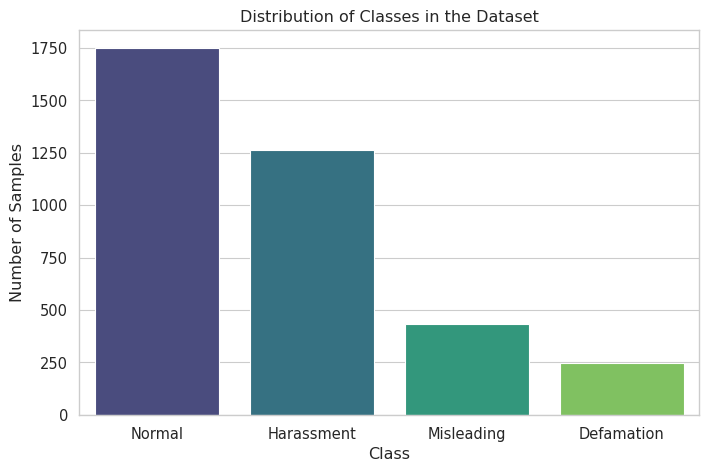

Insight: The dataset is imbalanced, with 'Normal' being the majority class. 'Defamation' and 'Misleading' are significant minority classes. This imbalance must be addressed during modeling, for instance, by using class weights or focal loss.


--- 2. Comparative Text Length Analysis ---


/tmp/ipython-input-499773412.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_name', y='word_count', data=df, palette='pastel')


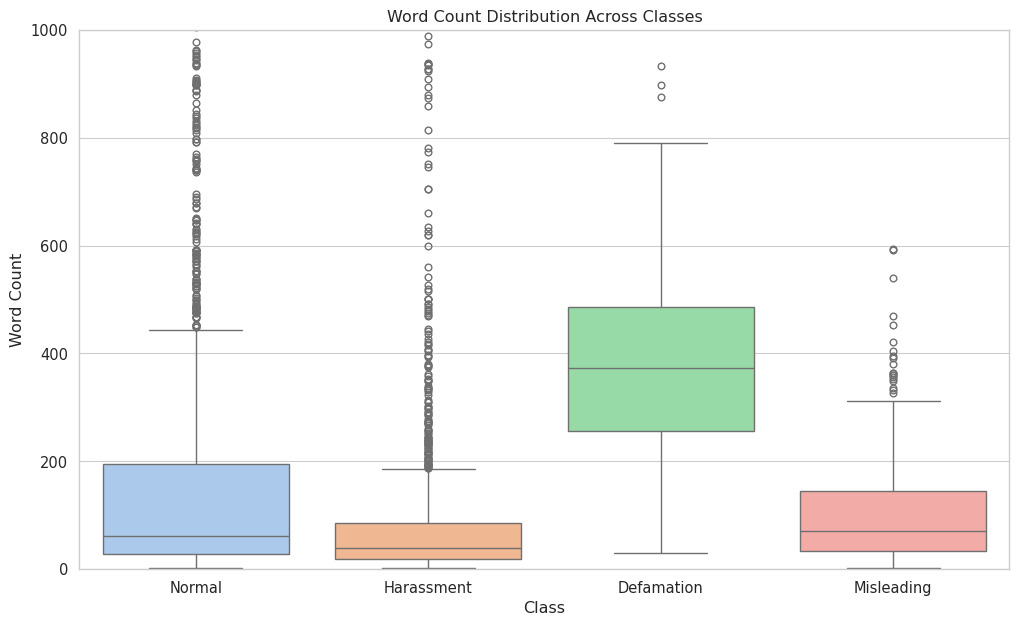

Median word count per class:
label_name
Defamation    373.0
Harassment     39.0
Misleading     70.0
Normal         61.0
Name: word_count, dtype: float64

Insight: There are stark differences in text length. 'Defamation' posts are significantly longer, resembling news articles. 'Harassment' posts are the shortest, characteristic of direct insults. 'Misleading' and 'Normal' posts fall in between, with 'Misleading' having a tighter distribution typical of ad copy.


--- 3. Comparative N-gram Analysis ---

--- Top Unigrams for 'Normal' ---
[('like', np.int64(713)), ('just', np.int64(708)), ('article', np.int64(654)), ('said', np.int64(633)), ('time', np.int64(513)), ('people', np.int64(479)), ('don', np.int64(479)), ('new', np.int64(457)), ('know', np.int64(452)), ('page', np.int64(450)), ('think', np.int64(439)), ('did', np.int64(365)), ('talk', np.int64(349)), ('year', np.int64(326)), ('wikipedia', np.int64(321))]

--- Top Bigrams for 'Normal' ---
[('year old', np.int64(123)), ('talk pag

/tmp/ipython-input-499773412.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='label_name', y='sentiment_compound', data=df, palette='coolwarm')


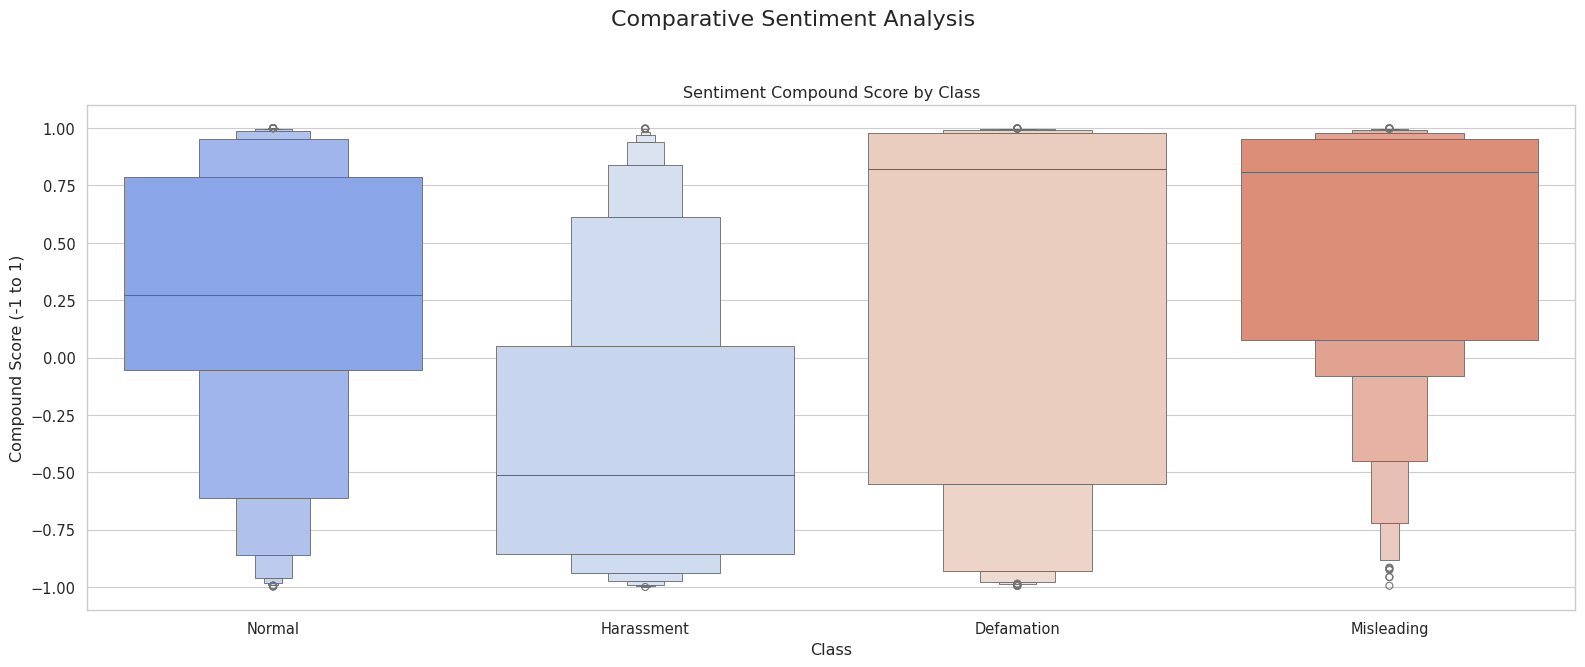


Insight: Sentiment and readability are strong distinguishing features.
- Sentiment: 'Harassment' is intensely negative. 'Defamation' is also negative but with a wider range, suggesting some posts adopt a neutral, journalistic tone. 'Misleading' and 'Normal' posts are generally neutral to positive.
- Readability: 'Defamation' texts are the most complex, aligning with their article-like structure. 'Harassment' texts are the simplest. 'Misleading' ads are written at an accessible, intermediate level to appeal to a broad audience.


✨ Comparative Exploratory Data Analysis Complete.


In [ ]:
# -*- coding: utf-8 -*-
"""
Comparative Exploratory Data Analysis (EDA) of Legal Risk Classes.

This script conducts a detailed comparative analysis of a dataset containing four classes
of text: Normal, Harassment, Defamation, and Misleading. The analysis focuses on
class distribution, text length, linguistic features (n-grams), sentiment, and
readability to uncover distinguishing characteristics for NLP model development.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import textstat
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# --- Setup and Configuration ---
# Download necessary NLTK models if not already present
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    print("Downloading necessary NLTK data packages...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt_tab')
# Set plot style for academic-style visualizations
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
pd.options.display.max_colwidth = 150

# --- Load and Prepare Data ---
FILE_PATH = '/content/final_dataset_with_normal.csv'
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"❌ Error: The file '{FILE_PATH}' was not found. Please ensure it's in the correct directory.")
    exit()

# Map numeric labels to human-readable names
label_map = {0: "Normal", 1: "Harassment", 2: "Defamation", 3: "Misleading"}
df['label_name'] = df['label'].map(label_map)

print("--- 1. Class Distribution Analysis ---")
class_counts = df['label_name'].value_counts()
print("Class distribution:")
print(class_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()
print("Insight: The dataset is imbalanced, with 'Normal' being the majority class. 'Defamation' and 'Misleading' are significant minority classes. This imbalance must be addressed during modeling, for instance, by using class weights or focal loss.")
print("\n" + "="*80 + "\n")

# --- 2. Comparative Text Length Analysis ---
print("--- 2. Comparative Text Length Analysis ---")
df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(str(x))))

plt.figure(figsize=(12, 7))
sns.boxplot(x='label_name', y='word_count', data=df, palette='pastel')
plt.title('Word Count Distribution Across Classes')
plt.xlabel('Class')
plt.ylabel('Word Count')
plt.ylim(0, 1000) # Zoom in on the main distribution, excluding extreme outliers
plt.show()

print("Median word count per class:")
print(df.groupby('label_name')['word_count'].median())
print("\nInsight: There are stark differences in text length. 'Defamation' posts are significantly longer, resembling news articles. 'Harassment' posts are the shortest, characteristic of direct insults. 'Misleading' and 'Normal' posts fall in between, with 'Misleading' having a tighter distribution typical of ad copy.")
print("\n" + "="*80 + "\n")

# --- 3. Comparative N-gram Analysis ---
print("--- 3. Comparative N-gram Analysis ---")
stop_words = set(stopwords.words('english'))

def get_top_ngrams_by_class(df, label_name, n=1, top_k=15):
    """Utility function to get top n-grams for a specific class."""
    corpus = df[df['label_name'] == label_name]['text']
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

for label_name in label_map.values():
    print(f"\n--- Top Unigrams for '{label_name}' ---")
    print(get_top_ngrams_by_class(df, label_name, n=1))
    print(f"\n--- Top Bigrams for '{label_name}' ---")
    print(get_top_ngrams_by_class(df, label_name, n=2))

print("\nInsight: Each class exhibits a distinct linguistic fingerprint.")
print("- Harassment: Dominated by profanity, insults, and second-person pronouns ('you', 'your').")
print("- Defamation: Characterized by proper nouns (celebrity names) and reporting verbs ('said', 'told').")
print("- Misleading: Features promotional language, calls to action, and superlative adjectives ('best', 'free', 'buy now').")
print("- Normal: Shows a diverse vocabulary related to everyday topics, lacking the specific patterns of the other classes.")
print("\n" + "="*80 + "\n")

# --- 4. Comparative Sentiment and Readability Analysis ---
print("--- 4. Comparative Sentiment and Readability Analysis ---")
sid = SentimentIntensityAnalyzer()

df['sentiment_compound'] = df['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
df['readability_fkgl'] = df['text'].apply(lambda x: textstat.flesch_kincaid_grade(str(x)))

plt.figure(figsize=(16, 7))
plt.suptitle('Comparative Sentiment Analysis', fontsize=16)

plt.subplot(1, 1, 1)
sns.boxenplot(x='label_name', y='sentiment_compound', data=df, palette='coolwarm')
plt.title('Sentiment Compound Score by Class')
plt.xlabel('Class')
plt.ylabel('Compound Score (-1 to 1)')

# plt.subplot(1, 2, 2)
# sns.violinplot(x='label_name', y='readability_fkgl', data=df, palette='plasma')
# plt.title('Readability (Flesch-Kincaid Grade Level) by Class')
# plt.xlabel('Class')
# plt.ylabel('U.S. Grade Level')
# plt.ylim(0, 30) # Cap y-axis for better visualization

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nInsight: Sentiment and readability are strong distinguishing features.")
print("- Sentiment: 'Harassment' is intensely negative. 'Defamation' is also negative but with a wider range, suggesting some posts adopt a neutral, journalistic tone. 'Misleading' and 'Normal' posts are generally neutral to positive.")
print("- Readability: 'Defamation' texts are the most complex, aligning with their article-like structure. 'Harassment' texts are the simplest. 'Misleading' ads are written at an accessible, intermediate level to appeal to a broad audience.")
print("\n" + "="*80 + "\n")

print("✨ Comparative Exploratory Data Analysis Complete.")

